In [110]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

In [111]:
#Our module is going to estimate those numbers
weight = 0.7
bias = 0.3

# Create data
X = torch.arange(0, 1, 0.02, device=device).unsqueeze(dim=1) #Device cuda?
Y = weight * X + bias

#60-80% Training set
#10-20% Validation set NOT OFTEN USED
#10-20% Testing set
train_split = int(0.8*(len(X)))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]


In [112]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  # Plot training data in blue
  plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data.cpu(), predictions.cpu(), c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10})

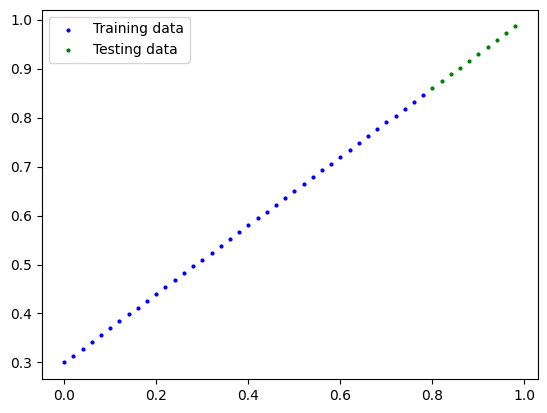

In [113]:
plot_predictions()
#We want to predict the green dots, and train on the blue ones

In [114]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, device=device),  requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, device=device), requires_grad=True )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #Linar regression formula   

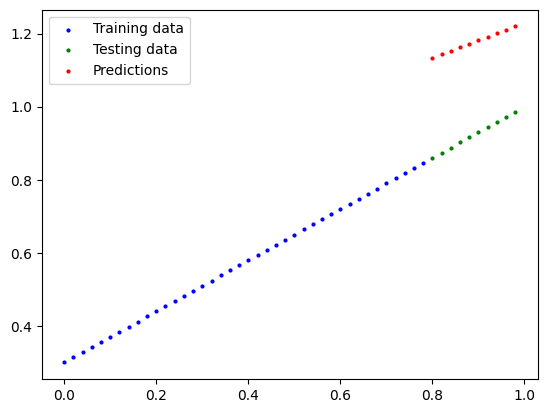

In [115]:
torch.manual_seed(128)
model_0 = LinearRegressionModel()
model_0.state_dict()

#Making prediction
with torch.inference_mode():
    pred = model_0(X_test)

plot_predictions(predictions=pred)


In [132]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

#Optmizers visually https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [133]:
torch.manual_seed(128)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, Y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0 or True:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().cpu().numpy())
            test_loss_values.append(test_loss.detach().cpu().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
model_0.state_dict(), weight, bias

Epoch: 0 | MAE Train Loss: 0.00015473589883185923 | MAE Test Loss: 0.0020541311241686344 
Epoch: 1 | MAE Train Loss: 0.0013459324836730957 | MAE Test Loss: 0.011416834779083729 
Epoch: 2 | MAE Train Loss: 0.010175053030252457 | MAE Test Loss: 0.0020541311241686344 
Epoch: 3 | MAE Train Loss: 0.0013459324836730957 | MAE Test Loss: 0.011416834779083729 
Epoch: 4 | MAE Train Loss: 0.010175053030252457 | MAE Test Loss: 0.0020541311241686344 
Epoch: 5 | MAE Train Loss: 0.0013459324836730957 | MAE Test Loss: 0.011416834779083729 
Epoch: 6 | MAE Train Loss: 0.010175053030252457 | MAE Test Loss: 0.0020541311241686344 
Epoch: 7 | MAE Train Loss: 0.0013459324836730957 | MAE Test Loss: 0.011416834779083729 
Epoch: 8 | MAE Train Loss: 0.010175053030252457 | MAE Test Loss: 0.0020541311241686344 
Epoch: 9 | MAE Train Loss: 0.0013459324836730957 | MAE Test Loss: 0.011416834779083729 


(OrderedDict([('weights', tensor([0.6975], device='cuda:0')),
              ('bias', tensor([0.2908], device='cuda:0'))]),
 0.7,
 0.3)

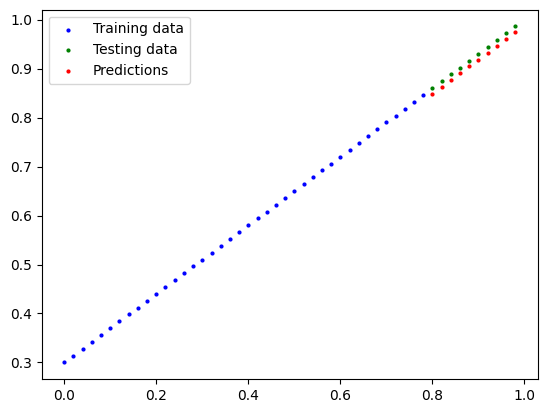

In [134]:
with torch.inference_mode():
    pred = model_0(X_test)

plot_predictions(predictions=pred)